In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd '/content/drive/MyDrive/Colab/26 EDA - Data Cleaning'

/content/drive/MyDrive/Colab/26 EDA - Data Cleaning


In [ ]:
drive.flush_and_unmount()

## Clean Columns

In [ ]:
import pandas as pd

student = {'RollNo': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           'Name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
           'Class': [12, 12, 'XII', '+2', 'XII', 12, 12, 11, 11, 10]}

df = pd.DataFrame(student)

df.Class.replace(['XII', '+2'], 12, inplace = True)

print(df.Class.value_counts().loc[12])

7


## Clean Outlet Type

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bigmart.csv')

df.Outlet_Type.replace(r'.*Supermarket.*', 'Supermarket', regex = True, inplace = True)

print(df.Outlet_Type.value_counts())

Supermarket      7440
Grocery Store    1083
Name: Outlet_Type, dtype: int64


## Drop Duplicates

In [ ]:
import pandas as pd

employee = {
    "Emp_No": [10001, 10002, 10003, 10004, 10004, 10005, 10005],
    "Name": ["Georgi", "Parto", "Christian", "Peace", "Peace", "Mary", "Mary"],
    "Designation": ["Senior Engineer", "Staff", "Senior Engineer", "Engineer", "Senior Engineer", "Staff", "Senior Staff"],
    "Salary": [60117, 62102, 66074, 66596, 71046, 66961, 74333]
}

df = pd.DataFrame(employee)

df.drop_duplicates(subset = 'Emp_No', keep = 'last', inplace = True)

print(df.shape)

(5, 4)


## Item Identifier

In [ ]:
import pandas as pd

df = pd.read_csv('bigmart.csv')

df.drop_duplicates(subset = ['Item_Identifier', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Visibility'], inplace = True, keep = 'first')

print(df.shape)

(8514, 12)


## Remove Rows

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                83
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


 Item_Identifier                 0
Item_Weight                  1450
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2387
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


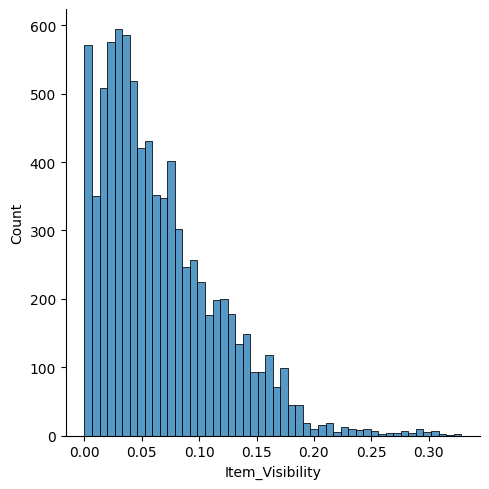

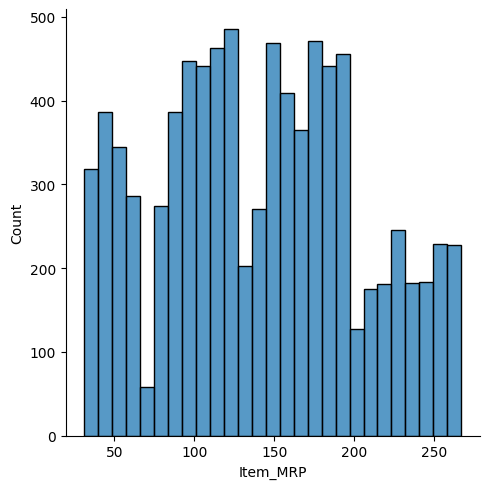

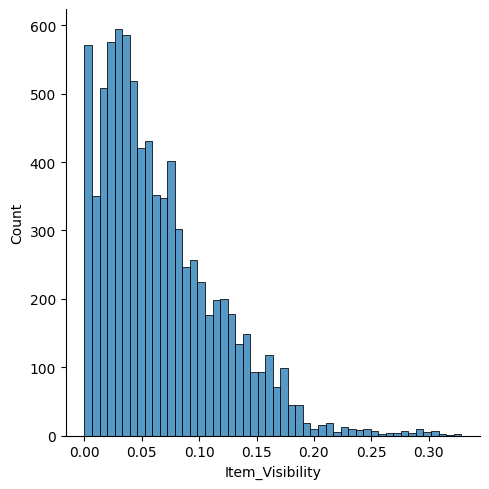

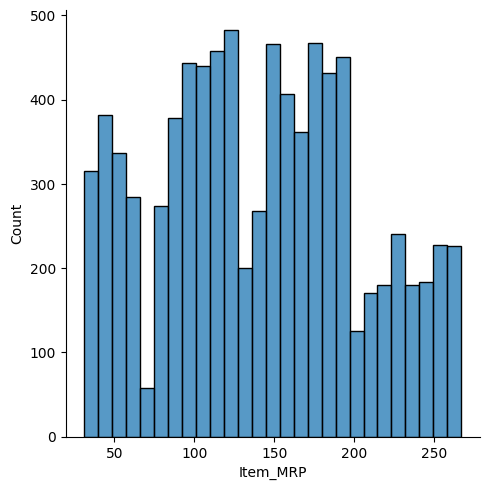

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bigmart_with_null.csv")

sns.displot(df, x = 'Item_Visibility')
sns.displot(df, x = 'Item_MRP')

print(df.isnull().sum())

df.dropna(subset = ['Item_Visibility', 'Item_MRP'], inplace = True, how = 'any')

print("\n\n",df.isnull().sum())

sns.displot(df, x = 'Item_Visibility')
sns.displot(df, x = 'Item_MRP')

print("No")

## Variance Change

In [ ]:
import pandas as pd

df = pd.read_csv('bigmart.csv')

print(df.Item_Weight.var())

df.Item_Weight.fillna(value = df.Item_Weight.median(), inplace = True)

print(df.Item_Weight.var())

21.561688259836558
17.869561454073647


## Use MICE

In [ ]:
import pandas as pd
import numpy as np
import statsmodels as sm
from statsmodels.imputation import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

salary = {"age": [25, 27, 29, 31, 33, 35],
          "experience": [np.nan, 3, 5, 7, 9, 11],
          "salary": [50, 70, 80, 90, 100, 130]}

df = pd.DataFrame(salary)

missing_values = df.isna()

df_imputed = mice.MICEData(df)

df_imputed.update_all(50)

x = df_imputed.data

df[missing_values] = x[missing_values]

print(df.experience.mean())

7.666666666666667


## Identify Outliers

-19
20


<ipython-input-9-7cb8358fb485>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

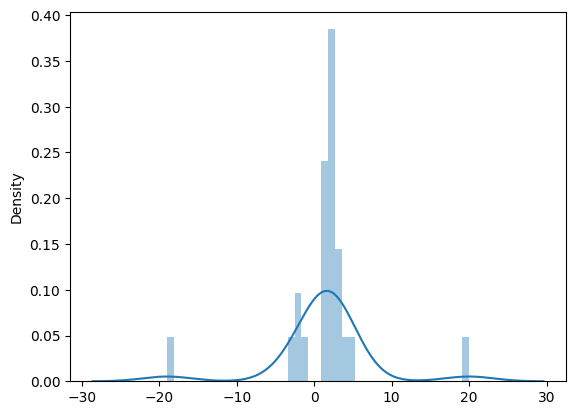

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = np.array([1, 2, 2, 2, 3, 1, 1, -19, 2, 2, 2, 3, 1, 1, 2, 20, 4, 2, 3, -3, 5, -2, -1, -2])

print(*data[np.abs(stats.zscore(data)) > 3], sep = '\n')

sns.distplot(data)

## Find Outliers

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("bigmart.csv")

print(len(df[np.abs(stats.zscore(df.Item_Visibility))>3]))

95


## Remove Outliers

In [ ]:
df.shape

(8523, 12)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("bigmart.csv")

df.drop(df[np.abs(stats.zscore(df.Item_Visibility))>3].index, inplace = True)

print(df.shape)

(8428, 12)
